# Applied Data Science Capstone - Final Project

First of all, we will import necessary libraries

In [1]:
# import pandas
import pandas as pd
# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Let's load first dataset: COVID-19 data by district

In [2]:
url_1 = "https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv"
df = pd.read_csv(url_1, sep = ';',encoding='cp1252')  

Due to Spanish Language, iso-8859-1 encoding has been used.
Now, take a first look of the data set

In [3]:
df.head()

,municipio_distrito,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Madrid-Retiro,2020/07/01 09:00:00,28.0,"23,47",1691.0,"1417,23",79603
1,Madrid-Salamanca,2020/07/01 09:00:00,23.0,"15,74",1781.0,"1218,99",79604
2,Madrid-Centro,2020/07/01 09:00:00,18.0,"13,35",1282.0,"950,7",79601
3,Madrid-Arganzuela,2020/07/01 09:00:00,16.0,"10,4",1769.0,"1150,17",79602
4,Madrid-Chamartín,2020/07/01 09:00:00,12.0,"8,23",1800.0,"1234,15",79605


First of all, let's translate column's names.

In [4]:
df = df.rename(columns={
    'municipio_distrito': 'town_district', 
    'fecha_informe': 'report_date', 
    'casos_confirmados_ultimos_14dias': 'positive_tests_last_14days', 
    'tasa_incidencia_acumulada_ultimos_14dias': 'cumulative_rate_last_14days',
    'casos_confirmados_totales': 'total_positive_tests',
    'tasa_incidencia_acumulada_total': 'total_cumulative_rate',
    'codigo_geometria': 'district_code'})
df.head()

,town_district,report_date,positive_tests_last_14days,cumulative_rate_last_14days,total_positive_tests,total_cumulative_rate,district_code
0,Madrid-Retiro,2020/07/01 09:00:00,28.0,"23,47",1691.0,"1417,23",79603
1,Madrid-Salamanca,2020/07/01 09:00:00,23.0,"15,74",1781.0,"1218,99",79604
2,Madrid-Centro,2020/07/01 09:00:00,18.0,"13,35",1282.0,"950,7",79601
3,Madrid-Arganzuela,2020/07/01 09:00:00,16.0,"10,4",1769.0,"1150,17",79602
4,Madrid-Chamartín,2020/07/01 09:00:00,12.0,"8,23",1800.0,"1234,15",79605


Dataset contains information from 26/02/2020 (February, 26th) to 01/07/2020 (July, 1st). The next step will be remove data previous to 01/07/2020.

In [5]:
df['report_date']= pd.to_datetime(df['report_date']) # convert column to datetime
df = df[(df['report_date'].dt.month == 7)]

Now, we will continue with our cleaning. Given that we will only study the districts of Madrid, the rest of the towns will be removed.
Districts have two main characteristics in data set: their names start with "Madrid" and their codes start with "796". Both features can be used to filter.

Let's filter by the first of them: keep only these rows whose "town_code" values start with "Madrid-"

In [6]:
df=df.loc[df['town_district'].apply(lambda x: x.startswith('Madrid-'))]
df

,town_district,report_date,positive_tests_last_14days,cumulative_rate_last_14days,total_positive_tests,total_cumulative_rate,district_code
0,Madrid-Retiro,2020-07-01 09:00:00,28.0,"23,47",1691.0,"1417,23",79603
1,Madrid-Salamanca,2020-07-01 09:00:00,23.0,"15,74",1781.0,"1218,99",79604
2,Madrid-Centro,2020-07-01 09:00:00,18.0,"13,35",1282.0,"950,7",79601
3,Madrid-Arganzuela,2020-07-01 09:00:00,16.0,"10,4",1769.0,"1150,17",79602
4,Madrid-Chamartín,2020-07-01 09:00:00,12.0,"8,23",1800.0,"1234,15",79605
5,Madrid-Tetuán,2020-07-01 09:00:00,11.0,"6,96",2233.0,"1413,09",79606
6,Madrid-Chamberí,2020-07-01 09:00:00,23.0,"16,5",1739.0,"1247,68",79607
7,Madrid-Fuencarral-El Pardo,2020-07-01 09:00:00,27.0,"10,98",3290.0,"1337,73",79608
8,Madrid-Moncloa-Aravaca,2020-07-01 09:00:00,25.0,"20,93",1568.0,"1313,02",79609
9,Madrid-Latina,2020-07-01 09:00:00,49.0,"20,57",3080.0,"1292,93",79610


Just a last check: let's get data types

In [7]:
df.dtypes

town_district                          object
report_date                    datetime64[ns]
positive_tests_last_14days            float64
cumulative_rate_last_14days            object
total_positive_tests                  float64
total_cumulative_rate                  object
district_code                           int64
dtype: object

As you can see, we have a couple of columns ("cumulative_rate_last_14days" and "total_cumulative_rate") with wrong type (due to Spanish decimal format, I suppose). Let's convert them

In [8]:
df['cumulative_rate_last_14days'] = df['cumulative_rate_last_14days'].str.replace(',', '.').astype(float)
df['total_cumulative_rate'] = df['total_cumulative_rate'].str.replace(',', '.').astype(float)
df.dtypes

town_district                          object
report_date                    datetime64[ns]
positive_tests_last_14days            float64
cumulative_rate_last_14days           float64
total_positive_tests                  float64
total_cumulative_rate                 float64
district_code                           int64
dtype: object

Now, it's time to remove those columns we aren't going to use: "report_date", "positive_tests_last_14days" and "cumulative_rate_last_14days"

In [9]:
df = df.drop(columns=['report_date', 'positive_tests_last_14days', 'cumulative_rate_last_14days'])

In [10]:
df

,town_district,total_positive_tests,total_cumulative_rate,district_code
0,Madrid-Retiro,1691.0,1417.23,79603
1,Madrid-Salamanca,1781.0,1218.99,79604
2,Madrid-Centro,1282.0,950.70,79601
3,Madrid-Arganzuela,1769.0,1150.17,79602
4,Madrid-Chamartín,1800.0,1234.15,79605
5,Madrid-Tetuán,2233.0,1413.09,79606
6,Madrid-Chamberí,1739.0,1247.68,79607
7,Madrid-Fuencarral-El Pardo,3290.0,1337.73,79608
8,Madrid-Moncloa-Aravaca,1568.0,1313.02,79609
9,Madrid-Latina,3080.0,1292.93,79610


It's time to the second dataset, which contains the coordinates of each district. 
As I mentioned before, due to the number of districts (only 21) and the impossibility to find their coordinates in any open data repository, coordinates of each district will be got “by hand” using Google and saving the result in a custom data set.

In [11]:
# The code was removed by Watson Studio for sharing.

,district_code,latitude,longitude
0,79604,"40,43","-3,67777778"
1,79601,"40,41527778","-3,7075"
2,79602,"40,40277778","-3,69527778"
3,79605,"40,45333333","-3,6775"
4,79606,"40,46055556","-3,7"


In this data set, and due to problems related to encoding, districts identify by their code instead of using theis name.
Let's clean this dataset a little bit: convert "latitude" and "longitude" to float

In [12]:
df_coordinates['latitude'] = df_coordinates['latitude'].str.replace(',', '.').astype(float)
df_coordinates['longitude'] = df_coordinates['longitude'].str.replace(',', '.').astype(float)
df_coordinates.dtypes

district_code      int64
latitude         float64
longitude        float64
dtype: object

In [13]:
df_coordinates

,district_code,latitude,longitude
0,79604,40.430000,-3.677778
1,79601,40.415278,-3.707500
2,79602,40.402778,-3.695278
3,79605,40.453333,-3.677500
4,79606,40.460556,-3.700000
5,79607,40.432778,-3.697222
6,79608,40.478611,-3.709722
7,79609,40.435470,-3.731700
8,79610,40.402500,-3.741389
9,79611,40.383611,-3.728056


Now, it's time to merge both datasets: using district code, we will add to the data set which contains the number of infections by districts, the coordinates of each districts using the second dataset.
To merge both, district code will be used as identifier.

In [14]:
df_districts_with_coordinates = pd.merge(df, df_coordinates, on='district_code')

In [15]:
df_districts_with_coordinates

,town_district,total_positive_tests,total_cumulative_rate,district_code,latitude,longitude
0,Madrid-Retiro,1691.0,1417.23,79603,40.408056,-3.676667
1,Madrid-Salamanca,1781.0,1218.99,79604,40.430000,-3.677778
2,Madrid-Centro,1282.0,950.70,79601,40.415278,-3.707500
3,Madrid-Arganzuela,1769.0,1150.17,79602,40.402778,-3.695278
4,Madrid-Chamartín,1800.0,1234.15,79605,40.453333,-3.677500
5,Madrid-Tetuán,2233.0,1413.09,79606,40.460556,-3.700000
6,Madrid-Chamberí,1739.0,1247.68,79607,40.432778,-3.697222
7,Madrid-Fuencarral-El Pardo,3290.0,1337.73,79608,40.478611,-3.709722
8,Madrid-Moncloa-Aravaca,1568.0,1313.02,79609,40.435470,-3.731700
9,Madrid-Latina,3080.0,1292.93,79610,40.402500,-3.741389


In order to visualize our districts, let's paint them over a map

In [16]:
!pip install folium
import folium

     |████████████████████████████████| 93 kB 2.9 MB/s eta 0:00:011


In [17]:

from geopy.geocoders import Nominatim 
address = 'Madrid'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_madrid = folium.Map(location=[latitude, longitude], zoom_start=11)

# our districts' name contains characters with diacritics, which are not correctly visualised in Folium map.
# This characters wll be replaced with same character but withou diacritics
repl = str.maketrans(
    "áéúíó",
    "aeuio"
)
map_madrid



Now, let's label districts by total cumulative rate. First of all, we are getting the min value and the max value

In [18]:
min_cumulative_rate = df_districts_with_coordinates['total_cumulative_rate'].min()
max_cumulative_rate = df_districts_with_coordinates['total_cumulative_rate'].max()


We'll define a range of 4 elements and each district will be labelled using this range. As we will use Choropleth, instead of use string labels, we will use int labels (0 = Low rate; 1 = Medium Rate; 2 = High Rate)

In [19]:
import numpy as np
# define ranges
total_cumulative_rate_range = np.linspace(start=min_cumulative_rate, stop=max_cumulative_rate, num=4)

# use ranges to label each district depending on its cumulative rate
rate_labels = pd.cut(df_districts_with_coordinates['total_cumulative_rate'], bins=total_cumulative_rate_range, include_lowest=True, labels=[0, 1, 2])

In [20]:
df_districts_with_coordinates['total_cumulative_rate_label'] = rate_labels
df_districts_with_coordinates

,town_district,total_positive_tests,total_cumulative_rate,district_code,latitude,longitude,total_cumulative_rate_label
0,Madrid-Retiro,1691.0,1417.23,79603,40.408056,-3.676667,2
1,Madrid-Salamanca,1781.0,1218.99,79604,40.430000,-3.677778,1
2,Madrid-Centro,1282.0,950.70,79601,40.415278,-3.707500,0
3,Madrid-Arganzuela,1769.0,1150.17,79602,40.402778,-3.695278,0
4,Madrid-Chamartín,1800.0,1234.15,79605,40.453333,-3.677500,1
5,Madrid-Tetuán,2233.0,1413.09,79606,40.460556,-3.700000,2
6,Madrid-Chamberí,1739.0,1247.68,79607,40.432778,-3.697222,1
7,Madrid-Fuencarral-El Pardo,3290.0,1337.73,79608,40.478611,-3.709722,1
8,Madrid-Moncloa-Aravaca,1568.0,1313.02,79609,40.435470,-3.731700,1
9,Madrid-Latina,3080.0,1292.93,79610,40.402500,-3.741389,1


In order to visualize the level of cumulative rate, we will use choropleth.
First of all, we will get districts in GeoJson format. Thanks to JORGE SANZ, this information is available here: https://team.carto.com/u/jsanz/tables/distritos/public
Once loaded in this project, we can start with Choropleth.

In [21]:
import json
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_70ec9abb804242e68896bd7dfd1af795.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-lor3rlo3b5kp0z', Key='distritos_modified.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

text = streaming_body_1.read()
districts_geojson = json.loads(text)

In [22]:
df_districts_with_coordinates['total_cumulative_rate_label'] = df_districts_with_coordinates['total_cumulative_rate_label'].astype(int)
df_districts_with_coordinates.dtypes

town_district                   object
total_positive_tests           float64
total_cumulative_rate          float64
district_code                    int64
latitude                       float64
longitude                      float64
total_cumulative_rate_label      int64
dtype: object

In [23]:

map_madrid.choropleth(
    geo_data=districts_geojson,
    data=df_districts_with_coordinates,
    columns=['town_district','total_cumulative_rate_label'],
    key_on='feature.properties.nombre',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.7,
    legend_name='COVID 19 Total Cumulative Rate',
    zoom_start=10
)

# display map
map_madrid

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Applying Choropleth, cumulative rate can be easily visualized.

In [24]:
# add markers to map
for lat, lng, district in zip(df_districts_with_coordinates['latitude'], df_districts_with_coordinates['longitude'], df_districts_with_coordinates['town_district']):
    label = '{}'.format(district.translate(repl)) # "translate" replaces, if needed, special characters
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
map_madrid    

Finally, it's time to use FourSquare

In [25]:
CLIENT_ID = 'HSU3DMLA0BDRLX0QG23L4UDYI3VHJZTXQMBDAZDGEFOUVMIY' # my Foursquare ID
CLIENT_SECRET = 'PT4JG0NBQJ2FZ5QQ1P3BXCARUWQ2CJ2GDVEFOD2R31HHPN3Y' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Using the function defined in week 3, we are going to get nearby venues in a radius of 500 meters for each district and save them in a new variable: nearby_venues_by_district

In [26]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
madrid_venues_by_district = getNearbyVenues(names=df_districts_with_coordinates['town_district'],
                                   latitudes=df_districts_with_coordinates['latitude'],
                                   longitudes=df_districts_with_coordinates['longitude']
                                  )
madrid_venues_by_district.head()

Madrid-Retiro
Madrid-Salamanca
Madrid-Centro
Madrid-Arganzuela
Madrid-Chamartín
Madrid-Tetuán
Madrid-Chamberí
Madrid-Fuencarral-El Pardo
Madrid-Moncloa-Aravaca
Madrid-Latina
Madrid-Carabanchel
Madrid-Usera
Madrid-Puente de Vallecas
Madrid-San Blas - Canillejas
Madrid-Barajas
Madrid-Moratalaz
Madrid-Ciudad Lineal
Madrid-Hortaleza
Madrid-Villaverde
Madrid-Villa de Vallecas
Madrid-Vicálvaro


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Madrid-Retiro,40.408056,-3.676667,Rincon De Extremadura,40.407017,-3.678272,Spanish Restaurant
1,Madrid-Retiro,40.408056,-3.676667,Don Giovanni,40.407648,-3.680188,Italian Restaurant
2,Madrid-Retiro,40.408056,-3.676667,Sidreria Astur II,40.405341,-3.677504,Spanish Restaurant
3,Madrid-Retiro,40.408056,-3.676667,Mezcal,40.406796,-3.677795,Mexican Restaurant
4,Madrid-Retiro,40.408056,-3.676667,Rosaleda del Retiro,40.410987,-3.680377,Garden


Now, we will execute some operations until we get 3 most common venue category for each district

In [28]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues_by_district[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
madrid_onehot['District'] = madrid_venues_by_district['District'] 

# move district column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,District,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Ramen Restaurant,Resort,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train,Train Station,Udon Restaurant,Wine Bar,Wine Shop
0,Madrid-Retiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Madrid-Retiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Madrid-Retiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Madrid-Retiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Madrid-Retiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, let's group rows by district by taking the mean of the frequency of occurrence of each category


In [29]:
madrid_grouped = madrid_onehot.groupby('District').mean().reset_index()
madrid_grouped

,District,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Cafeteria,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Ramen Restaurant,Resort,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train,Train Station,Udon Restaurant,Wine Bar,Wine Shop
0,Madrid-Arganzuela,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000,0.000000,0.045455,0.011364,0.011364,0.022727,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.022727,0.011364,0.0,0.022727,0.011364,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.011364,0.011364,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.000000,0.000,0.000000,0.000000,0.011364,0.022727,0.011364,0.000000,0.000000,0.011364,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.056818,0.011364,0.034091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000,0.000000,0.011364,0.011364,0.011364,0.000000,0.000000,0.011364,0.000000,0.000000,0.022727,0.000000,0.011364,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.011364,0.011364,0.000000,0.0,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000,0.00,0.000000,0.000000,0.000000,0.102273,0.000000,0.000000,0.000000,0.022727,0.011364,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.113636,0.000000,0.000000,0.000000,0.000000,0.045455,0.011364,0.000000,0.011364,0.000000,0.011364,0.011364,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.000000
1,Madrid-Barajas,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,0.000,0.000000,0.000000,0.000000,0.032258,0.032258,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000

Now, we will print each district with its top 10 venues

In [30]:
num_top_venues = 5

for district in madrid_grouped['District']:
    print("----"+district+"----")
    temp = madrid_grouped[madrid_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Madrid-Arganzuela----
                venue  freq
0  Spanish Restaurant  0.11
1          Restaurant  0.10
2       Grocery Store  0.06
3              Bakery  0.05
4    Tapas Restaurant  0.05


----Madrid-Barajas----
                venue  freq
0               Hotel  0.23
1  Spanish Restaurant  0.13
2          Restaurant  0.10
3         Supermarket  0.06
4    Tapas Restaurant  0.06


----Madrid-Carabanchel----
          venue  freq
0         Plaza  0.18
1  Burger Joint  0.09
2  Soccer Field  0.09
3   Pizza Place  0.09
4     Nightclub  0.09


----Madrid-Centro----
                venue  freq
0    Tapas Restaurant  0.11
1  Spanish Restaurant  0.11
2               Plaza  0.10
3              Hostel  0.05
4      Ice Cream Shop  0.03


----Madrid-Chamartín----
                venue  freq
0  Spanish Restaurant  0.15
1          Restaurant  0.13
2              Bakery  0.06
3    Tapas Restaurant  0.06
4       Grocery Store  0.06


----Madrid-Chamberí----
                venue  freq
0          

Now, and cotinuing with week 3 lab, we will save this last result into a pandas dataframe.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid-Arganzuela,Spanish Restaurant,Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Hotel,Falafel Restaurant,Beer Garden
1,Madrid-Barajas,Hotel,Spanish Restaurant,Restaurant,Coffee Shop,Supermarket,Tapas Restaurant,Gastropub,Bistro,Japanese Restaurant,Mexican Restaurant
2,Madrid-Carabanchel,Plaza,Metro Station,Burger Joint,Fast Food Restaurant,Nightclub,Tapas Restaurant,Bakery,Pizza Place,Grocery Store,Soccer Field
3,Madrid-Centro,Tapas Restaurant,Spanish Restaurant,Plaza,Hostel,Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Café,Bookstore
4,Madrid-Chamartín,Spanish Restaurant,Restaurant,Tapas Restaurant,Grocery Store,Bakery,Japanese Restaurant,Café,Coffee Shop,Pizza Place,Gastropub
5,Madrid-Chamberí,Bar,Restaurant,Café,Spanish Restaurant,Brewery,Plaza,Italian Restaurant,Tapas Restaurant,Bakery,Burger Joint
6,Madrid-Ciudad Lineal,Spanish Restaurant,Grocery Store,Hotel,Italian Restaurant,Pizza Place,Snack Place,Coffee Shop,Fast Food Restaurant,Café,Chinese Restaurant
7,Madrid-Fuencarral-El Pardo,Clothing Store,Italian Restaurant,Fast Food Restaurant,Tapas Restaurant,Restaurant,Burger Joint,Shopping Mall,Department Store,Kebab Restaurant,Sandwich Place
8,Madrid-Hortaleza,Breakfast Spot,Pizza Place,Supermarket,Spanish Restaurant,Pharmacy,Donut Shop,Plaza,Clothing Store,Chinese Restaurant,Restaurant
9,Madrid-Latina,Pizza Place,Falafel Restaurant,Metro Station,Train Station,Park,Grocery Store,Asian Restaurant,Fast Food Restaurant,Bakery,Food & Drink Shop


It's tim to apply k-means to cluster districts according to their top 10 venues

In [32]:
# import k-means
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

madrid_grouped_clustering = madrid_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2],
      dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each district.


In [33]:
# add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [34]:
districts_venues_sorted

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Madrid-Arganzuela,Spanish Restaurant,Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Hotel,Falafel Restaurant,Beer Garden
1,1,Madrid-Barajas,Hotel,Spanish Restaurant,Restaurant,Coffee Shop,Supermarket,Tapas Restaurant,Gastropub,Bistro,Japanese Restaurant,Mexican Restaurant
2,0,Madrid-Carabanchel,Plaza,Metro Station,Burger Joint,Fast Food Restaurant,Nightclub,Tapas Restaurant,Bakery,Pizza Place,Grocery Store,Soccer Field
3,1,Madrid-Centro,Tapas Restaurant,Spanish Restaurant,Plaza,Hostel,Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Café,Bookstore
4,1,Madrid-Chamartín,Spanish Restaurant,Restaurant,Tapas Restaurant,Grocery Store,Bakery,Japanese Restaurant,Café,Coffee Shop,Pizza Place,Gastropub
5,1,Madrid-Chamberí,Bar,Restaurant,Café,Spanish Restaurant,Brewery,Plaza,Italian Restaurant,Tapas Restaurant,Bakery,Burger Joint
6,1,Madrid-Ciudad Lineal,Spanish Restaurant,Grocery Store,Hotel,Italian Restaurant,Pizza Place,Snack Place,Coffee Shop,Fast Food Restaurant,Café,Chinese Restaurant
7,1,Madrid-Fuencarral-El Pardo,Clothing Store,Italian Restaurant,Fast Food Restaurant,Tapas Restaurant,Restaurant,Burger Joint,Shopping Mall,Department Store,Kebab Restaurant,Sandwich Place
8,1,Madrid-Hortaleza,Breakfast Spot,Pizza Place,Supermarket,Spanish Restaurant,Pharmacy,Donut Shop,Plaza,Clothing Store,Chinese Restaurant,Restaurant
9,0,Madrid-Latina,Pizza Place,Falafel Restaurant,Metro Station,Train Station,Park,Grocery Store,Asian Restaurant,Fast Food Restaurant,Bakery,Food & Drink Shop


In [35]:
types_of_venues = np.unique(districts_venues_sorted[districts_venues_sorted.columns[2:4]].values)

In [36]:
types_of_venues

array(['Asian Restaurant', 'Bakery', 'Bar', 'Breakfast Spot',
       'Clothing Store', 'Falafel Restaurant', 'Grocery Store', 'Gym',
       'Hotel', 'Italian Restaurant', 'Metro Station', 'Park',
       'Pizza Place', 'Plaza', 'Pub', 'Restaurant', 'Seafood Restaurant',
       'Spanish Restaurant', 'Tapas Restaurant', 'Train Station'],
      dtype=object)

In [37]:
clusters_info = pd.DataFrame(data={'Cluster': districts_venues_sorted["Cluster Labels"].unique()})

for i in types_of_venues:
    clusters_info[i] = [0,0,0,0]

In [38]:
# add number of each type of venue for each cluster
for index in clusters_info.index:
    cluster_index = index
    # get cluster
    cluster = clusters_info['Cluster'][cluster_index]
    districts_rows = districts_venues_sorted.loc[districts_venues_sorted['Cluster Labels'] == cluster]
    # sum each kind of venue
    for index in districts_rows.columns[3:]:
        district_index = index
        
        for index in districts_rows[district_index].index:
            district_row_index = index
            if (districts_rows[district_index][district_row_index] in clusters_info):
                clusters_info[districts_rows[district_index][district_row_index]][cluster_index] = clusters_info[districts_rows[district_index][district_row_index]][cluster_index] + 1
            
clusters_info

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Cluster,Asian Restaurant,Bakery,Bar,Breakfast Spot,Clothing Store,Falafel Restaurant,Grocery Store,Gym,Hotel,Italian Restaurant,Metro Station,Park,Pizza Place,Plaza,Pub,Restaurant,Seafood Restaurant,Spanish Restaurant,Tapas Restaurant,Train Station
0,1,1,5,3,1,1,1,6,1,2,3,2,0,5,3,1,9,1,5,7,0
1,0,2,3,1,0,0,1,4,1,0,0,2,2,3,1,0,0,0,1,1,2
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


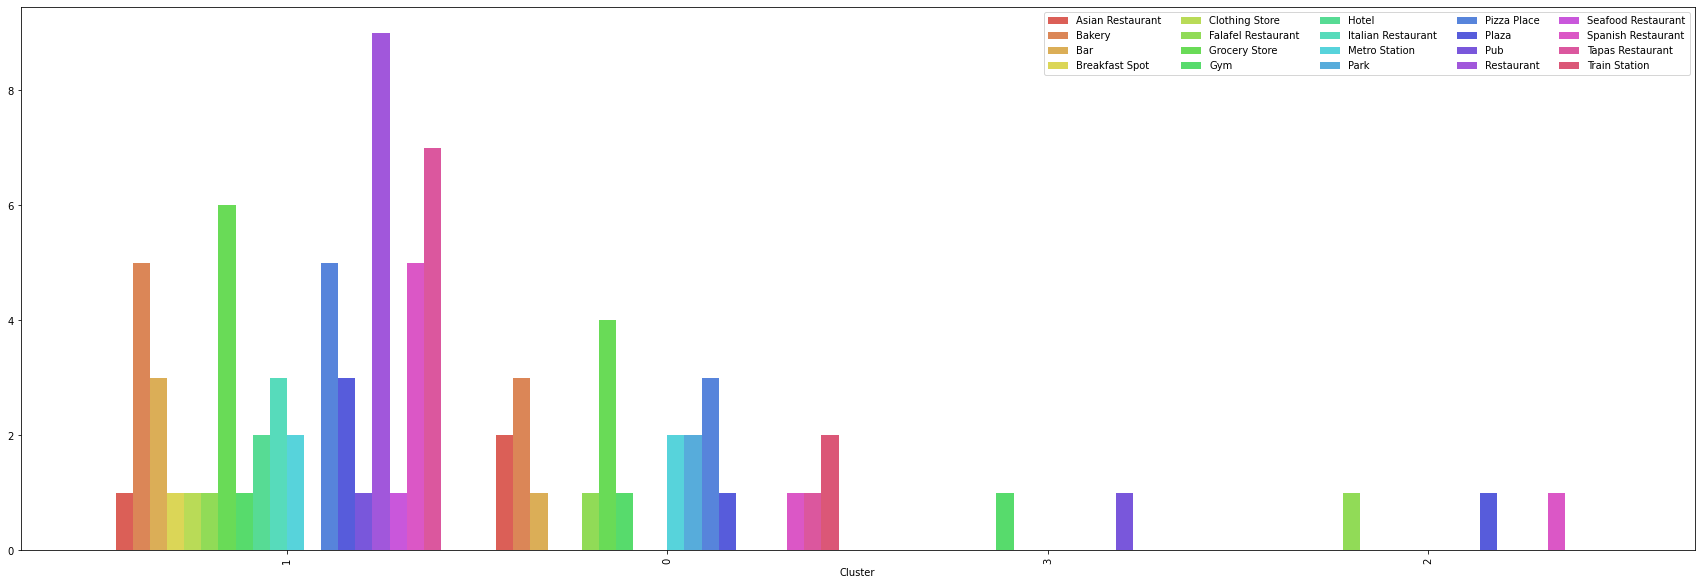

In [39]:
import seaborn as sns

colors = sns.color_palette("hls", len(types_of_venues))
    
cluster_plot = clusters_info.plot(x='Cluster', y=types_of_venues, kind="bar", figsize=(30,10), width=0.9, color=colors)
cluster_plot.legend(ncol=5)

cluster_plot

In [40]:
madrid_merged = df_districts_with_coordinates

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(districts_venues_sorted.set_index('District'), on='town_district')

madrid_merged.head() 

,town_district,total_positive_tests,total_cumulative_rate,district_code,latitude,longitude,total_cumulative_rate_label,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid-Retiro,1691.0,1417.23,79603,40.408056,-3.676667,2,1,Spanish Restaurant,Gym,Supermarket,Tapas Restaurant,Bar,Grocery Store,Mediterranean Restaurant,Brewery,Burger Joint,Food & Drink Shop
1,Madrid-Salamanca,1781.0,1218.99,79604,40.430000,-3.677778,1,1,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Seafood Restaurant,Bakery,Tapas Restaurant,Coffee Shop,Mexican Restaurant,Burger Joint,Supermarket
2,Madrid-Centro,1282.0,950.70,79601,40.415278,-3.707500,0,1,Tapas Restaurant,Spanish Restaurant,Plaza,Hostel,Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Café,Bookstore
3,Madrid-Arganzuela,1769.0,1150.17,79602,40.402778,-3.695278,0,1,Spanish Restaurant,Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Hotel,Falafel Restaurant,Beer Garden
4,Madrid-Chamartín,1800.0,1234.15,79605,40.453333,-3.677500,1,1,Spanish Restaurant,Restaurant,Tapas Restaurant,Grocery Store,Bakery,Japanese Restaurant,Café,Coffee Shop,Pizza Place,Gastropub


In [41]:
madrid_merged

,town_district,total_positive_tests,total_cumulative_rate,district_code,latitude,longitude,total_cumulative_rate_label,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid-Retiro,1691.0,1417.23,79603,40.408056,-3.676667,2,1,Spanish Restaurant,Gym,Supermarket,Tapas Restaurant,Bar,Grocery Store,Mediterranean Restaurant,Brewery,Burger Joint,Food & Drink Shop
1,Madrid-Salamanca,1781.0,1218.99,79604,40.430000,-3.677778,1,1,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Seafood Restaurant,Bakery,Tapas Restaurant,Coffee Shop,Mexican Restaurant,Burger Joint,Supermarket
2,Madrid-Centro,1282.0,950.70,79601,40.415278,-3.707500,0,1,Tapas Restaurant,Spanish Restaurant,Plaza,Hostel,Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Café,Bookstore
3,Madrid-Arganzuela,1769.0,1150.17,79602,40.402778,-3.695278,0,1,Spanish Restaurant,Restaurant,Grocery Store,Tapas Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Hotel,Falafel Restaurant,Beer Garden
4,Madrid-Chamartín,1800.0,1234.15,79605,40.453333,-3.677500,1,1,Spanish Restaurant,Restaurant,Tapas Restaurant,Grocery Store,Bakery,Japanese Restaurant,Café,Coffee Shop,Pizza Place,Gastropub
5,Madrid-Tetuán,2233.0,1413.09,79606,40.460556,-3.700000,2,1,Spanish Restaurant,Bakery,Coffee Shop,Supermarket,Chinese Restaurant,Brazilian Restaurant,Grocery Store,Farmers Market,Pizza Place,Gym / Fitness Center
6,Madrid-Chamberí,1739.0,1247.68,79607,40.432778,-3.697222,1,1,Bar,Restaurant,Café,Spanish Restaurant,Brewery,Plaza,Italian Restaurant,Tapas Restaurant,Bakery,Burger Joint
7,Madrid-Fuencarral-El Pardo,3290.0,1337.73,79608,40.478611,-3.709722,1,1,Clothing Store,Italian Restaurant,Fast Food Restaurant,Tapas Restaurant,Restaurant,Burger Joint,Shopping Mall,Department Store,Kebab Restaurant,Sandwich Place
8,Madrid-Moncloa-Aravaca,1568.0,1313.02,79609,40.435470,-3.731700,1,3,Spanish Restaurant,Gym,Pool,Pub,Wine Shop,Electronics Store,Food,Flea Market,Fish Market,Fast Food Restaurant
9,Madrid-Latina,3080.0,1292.93,79610,40.402500,-3.741389,1,0,Pizza Place,Falafel Restaurant,Metro Station,Train Station,Park,Grocery Store,Asian Restaurant,Fast Food Restaurant,Bakery,Food & Drink Shop


In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors
markers_colors = []
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, cluster in zip(madrid_merged['latitude'], madrid_merged['longitude'], madrid_merged['town_district'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_madrid)
       
map_madrid